<a href="https://colab.research.google.com/github/99marwan/Movies-Reviews-Classification-Using-BERT/blob/main/Movies-Reviews-Classification-Using-BERT(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4 AI

## Download IMDB Dataset

In [ ]:
! pip install kaggle==1.5.6
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
! unzip /content/imdb-dataset-of-50k-movie-reviews.zip
! rm /content/imdb-dataset-of-50k-movie-reviews.zip

     |████████████████████████████████| 58 kB 2.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72858 sha256=985d0c3527e7951939e6fd096dc9207ea68154f85b61f14aa344e84c97ae0b50
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12
 35% 9.00M/25.7M [00:00<00:00, 86.6MB/s]
100% 25.7M/25.7M [00:00<00:00, 161MB/s] 
Archive:  /content/imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


## Imports


In [ ]:
import pandas as pd
import numpy as np
import csv

# Import Cross Validation
from sklearn.model_selection import cross_val_predict
# Import Train_Test_Split
from sklearn.model_selection import train_test_split
# Plot
import matplotlib.pyplot as plt

# Scaling
#from sklearn.preprocessing import StandardScaler

#Import nltk library
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#nltk.download('corpus')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize , RegexpTokenizer
from string import punctuation
stopwords = nltk.corpus.stopwords.words('english')
wordnet = nltk.corpus.wordnet
from nltk import pos_tag
lemmatizer = nltk.stem.WordNetLemmatizer()
#DI_POS_TYPES = {'NN':'n', 'JJ':'a', 'VB':'v', 'RB':'r'} 

# Scoring
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#model
#!pip install -q torch==1.4.0 -f https://download.pytorch.org/whl/cu101/torch_stable.html
!pip install transformers 
import torch
import numpy as np
from transformers import BertTokenizer
from torch import nn
from transformers import BertModel
from torch.optim import Adam
from tqdm import tqdm

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
     |████████████████████████████████| 3.5 MB 5.3 MB/s 
     |████████████████████████████████| 6.8 MB 43.4 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
     |████████████████████████████████| 596 kB 45.5 MB/s 
     |████████████████████████████████| 895 kB 44.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## Data Balancing

In [ ]:
col_names = ["review", "sentiment"]
data = pd.read_csv("/content/IMDB Dataset.csv", names=col_names)
#data = pd.read_csv("/content/IMDB Dataset.csv", names=col_names, quoting=csv.QUOTE_NONE)
data_positive = data[data["sentiment"] == "positive"]
data_negative = data[data["sentiment"] == "negative"]

#balance_data_positive = data_positive.sample(n = len(data_negative), random_state=5)
print(data_positive)
print(data_negative)
#print(balance_data_positive)

                                                  review sentiment
1      One of the other reviewers has mentioned that ...  positive
2      A wonderful little production. <br /><br />The...  positive
3      I thought this was a wonderful way to spend ti...  positive
5      Petter Mattei's "Love in the Time of Money" is...  positive
6      Probably my all-time favorite movie, a story o...  positive
...                                                  ...       ...
49984  I loved it, having been a fan of the original ...  positive
49986  Imaginary Heroes is clearly the best film of t...  positive
49990  I got this one a few weeks ago and love it! It...  positive
49993  John Garfield plays a Marine who is blinded by...  positive
49996  I thought this movie did a down right good job...  positive

[25000 rows x 2 columns]
                                                  review sentiment
4      Basically there's a family where a little boy ...  negative
8      This show was an amazing, fre

## Data Split

In [ ]:
# Ratios
ratio_train = 0.70
ratio_val = 0.10
ratio_test = 0.20

# Data to train models
final_data = np.concatenate((data_positive,data_negative),axis=0)
X_final_data = final_data[:, :-1]
y_final_data = final_data[: , 1]

# Produce test set (20%)
X_remaining, X_test, y_remaining, y_test = train_test_split(X_final_data, y_final_data, test_size=ratio_test, random_state=5, stratify=y_final_data)

# Adjust ratios so that validation set is 10% of original data size (0.125 of remaining = 0.10 of original)
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produce train set (70%) and validation set (10%)
X_train, X_val, y_train, y_val = train_test_split(X_remaining, y_remaining, test_size=ratio_val_adjusted, random_state=5, stratify=y_remaining)

# Printing checks
print(len(final_data))
print(final_data)

print("==============================")

print(len(X_train))
print(X_train)

print("==============================")

print(len(y_train))
print(y_train)
print(np.count_nonzero(y_train == "positive"))
print(np.count_nonzero(y_train == "negative"))

print("==============================")

print(len(X_val))
print(X_val)

print("==============================")

print(len(y_val))
print(y_val)
print(np.count_nonzero(y_val == "positive"))
print(np.count_nonzero(y_val == "negative"))

print("==============================")

print(len(X_test))
print(X_test)

print("==============================")

print(len(y_test))
print(y_test)
print(np.count_nonzero(y_test == "positive"))
print(np.count_nonzero(y_test == "negative"))

print("==============================")

50000
[["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

## Text Pre-processing

In [ ]:
# def get_wordnet_pos(tag):
#     """Map POS tag to first character lemmatize() accepts"""
#     # tag = nltk.pos_tag([word])[0][1][0].upper()
#     tag_dict = {"J": wordnet.ADJ,
#                 "N": wordnet.NOUN,
#                 "V": wordnet.VERB,
#                 "R": wordnet.ADV}

#     return tag_dict.get(tag, wordnet.NOUN)
def get_wordnet_pos(wordTag):
    if wordTag.startswith('J'):
        return wordnet.ADJ
    elif wordTag.startswith('V'):
        return wordnet.VERB
    elif wordTag.startswith('N'):
        return wordnet.NOUN 
    elif wordTag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
def Lemmatization(sentence):
  
  lemmatized_Sentence = [lemmatizer.lemmatize(word[0], pos=get_wordnet_pos(word[1])) for word in pos_tag(sentence)]
  # lemmatized_Sentence = [lemmatizer.lemmatize(c,get_wordnet_pos(c)) for c in sentence ]
  return lemmatized_Sentence

In [ ]:
def Lower_Case(sentence):
  lowerCase_Sentences = [c.lower() for c in sentence ]
  return lowerCase_Sentences

In [ ]:
def remove_StopWords(sentence):
  sentence_nonStopWords = [c for c in sentence if c not in stopwords]
  return sentence_nonStopWords


In [ ]:
def NLTK_Preprocessing(li_quotes):
  
  #TOKENIZE AND REMOVE PUNCTUATION
  tokenized = []
  
  tokenizer = RegexpTokenizer("[\w']+")
  for sentence in  li_quotes :
      tokenized_sentence = tokenizer.tokenize(sentence)
      tokenized_sentence = remove_StopWords(tokenized_sentence)
      tokenized_sentence = Lower_Case(tokenized_sentence)
      tokenized_sentence = Lemmatization(tokenized_sentence)
      tokenized_sentence = " ".join(tokenized_sentence) 
    #  tokenized_sentence = word_tokenize(sentence)    
      tokenized.append(tokenized_sentence)
  

  #REMOVE STOPWORDS
  #tokenized = list(map(remove_StopWords, tokenized))
 
  #TO LOWER CASE
  #tokenized = list(map(Lower_Case, tokenized))

  #print(tokenized[0])
  #print(type(tokenized[0]))

  #print(tokenized[1][4])
  #print(get_wordnet_pos(tokenized[1][4]))
  #print(tokenized[2])
  #tokenized = list(map(Lemmatization, tokenized))

  
  #print(tokenized[0])
  #print(tokenized[1][4])
  #print(get_wordnet_pos(tokenized[1][4]))
  #print(nltk.pos_tag([tokenized[1][4]]))
  #print(get_wordnet_pos_treebank( nltk.pos_tag(tokenized[1][4])[0] ))
  #print(tokenized[2])
  #sentences = [word_tokenize(string) for string in li_quotes[0]]
  #print(sentences)
  #tokenized_word=word_tokenize(li_quotes)
  #print(tokenized_word)

  return tokenized

In [ ]:
# Pre-processing steps
# (a) Remove punctuation
# (b) Remove stop words
# (c) Lowercase all characters
# (d) Lemmatization of words

# Preparation

#punctuation = list(punctuation)



# X_train_modified = NLTK_Preprocessing(X_train.ravel())
# X_val_modified = NLTK_Preprocessing(X_val.ravel())
# X_test_modified = NLTK_Preprocessing(X_test.ravel())
# print(nltk.pos_tag(["amaze"]))
# c = "amaaaaaaaaaaaaaaaaaazing"
# print(lemmatizer.lemmatize(c,get_wordnet_pos(c)))

# print(X_val_modified)


#X_train = nltk.word_tokenize(X_train)
#cleaned_tokens = [token for token in X_train if token not in stop_words and token not in punctuation]








IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## dataset class


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'negative':0,
          'positive':1,
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, X, Y):

        self.labels = [labels[label] for label in Y]
      
        self.texts = [tokenizer(str(text[0]), 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in X]
        
    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

## build model


In [ ]:
class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear1 = nn.Linear(768, 512)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(128, 64)
        self.relu4 = nn.ReLU()
        self.linear5 = nn.Linear(64, 1)
        #self.sigmoid = nn.Sigmoid()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear1_output = self.linear1(dropout_output)
        relu1 = self.relu1(linear1_output)
  
        linear2_output = self.linear2(relu1)
        relu2 = self.relu2(linear2_output)
    
        linear3_output = self.linear3(relu2)
        relu3 = self.relu3(linear3_output)
        
        linear4_output = self.linear4(relu3)
        relu4 = self.relu4(linear4_output)
       
        linear5_output = self.linear5(relu4)
        # sigmoid = self.sigmoid(linear5_output)

        return linear5_output

## train Loop
### we need to save model after each epoch ***enter path to save model in it***

In [ ]:
def train(model, X_train_data, Y_train_data, X_val_data, Y_val_data, learning_rate, epochs):

    train, val = Dataset( X_train_data, Y_train_data), Dataset( X_val_data, Y_val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=1, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=1)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    criterion = nn.BCEWithLogitsLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=1)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                #edit
                #we need output to be float
                train_label = train_label.to(torch.float32)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                #edit
                #unsqueeze makes size correct
                batch_loss = criterion(output, train_label.unsqueeze(1))
                total_loss_train += batch_loss.item()

                output = torch.round(torch.sigmoid(output))
                acc = (output == train_label).sum().item()
                
                #acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
              
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)

                    val_label = val_label.to(torch.float32)

                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    #batch_loss = criterion(output, val_label)
                    batch_loss = criterion(output, val_label.unsqueeze(1))

                    total_loss_val += batch_loss.item()
                    
                    output = torch.round(torch.sigmoid(output))
                    acc = (output == val_label).sum().item()

                    #acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc     
  
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(Y_train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(Y_train_data): .3f} \
                | Val Loss: {total_loss_val / len(Y_val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(Y_val_data): .3f}')
            
            for param_group in optimizer.param_groups:
              print(param_group['lr'])
            
            scheduler.step(total_loss_val)
            
            #enter path here
            torch.save(model, '/content/gdrive/MyDrive/BERT folder/model_prepocessed_1e-6.pt')

## google drive setup to save model


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Classification using BERT

In [ ]:
EPOCHS = 5
model = BertClassifier()

LR = 1e-6
              
# X_train_n, X_v, y_train_n, y_v = train_test_split(X_train, y_train, test_size=0.99, random_state=5, stratify=y_train)
# X_val_n, X_z, y_val_n, y_z = train_test_split(X_val, y_val, test_size=0.99, random_state=5, stratify=y_val)

X_train_modified = NLTK_Preprocessing(X_train.ravel())

              
train(model, X_train_modified, y_train, X_val, y_val, LR, EPOCHS)


## Prediction


In [ ]:
def evaluate(model, X_test_data, y_test_data):

    test = Dataset( X_test_data, y_test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=1)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              #edit
              #we need output to be float
              test_label = test_label.to(torch.float32)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              #acc = (output.argmax(dim=1) == test_label).sum().item()

              output = torch.round(torch.sigmoid(output))
              acc = (output == test_label).sum().item()

              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(y_test_data): .3f}')

In [ ]:
def evaluate(model, X_test_data, y_test_data):

    test = Dataset( X_test_data, y_test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=1)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:

        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():
        predY=[]
        predY=torch.tensor(predY)
        predY=predY.to(device)
    
        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              #edit
              #we need output to be float
              test_label = test_label.to(torch.float32)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              #acc = (output.argmax(dim=1) == test_label).sum().item()

              output = torch.round(torch.sigmoid(output))
              predY=torch.cat((predY,output))
              acc = (output == test_label).sum().item()

              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(y_test_data): .3f}')

    predY = torch.flatten(predY)
    predY=predY.detach().cpu().numpy()
    testing=np.where(y_test_data=='positive',1,0)
    predY=np.where(predY==1,1,0)
    print(predY)
    print(testing)
    print("Confusion Matrix:")
    print(confusion_matrix(testing, predY,labels=[0,1]))
    print("Accuracy:")
    print((accuracy_score(testing, predY) * 100), "%")
    print(classification_report(testing, predY))

    print("==============================")

    # plot_confusion_matrix(model(input_id, mask), X_test_data, y_test_data,labels=[0,1])
    # plt.show()
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(testing, predY,labels=[0,1]),
                              display_labels=[0,1])


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
    disp = disp.plot()

    plt.show()

Test Accuracy:  0.925
[0 1 1 ... 1 1 0]
[0 1 1 ... 1 1 1]
Confusion Matrix:
[[4546  454]
 [ 294 4706]]
Accuracy:
92.52 %
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      5000
           1       0.91      0.94      0.93      5000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



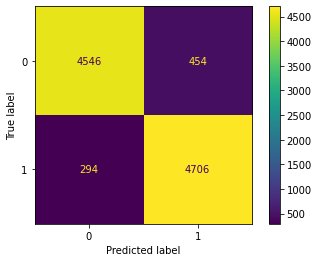

In [ ]:
model = torch.load('/content/gdrive/MyDrive/BERT folder/model_unprepocessed_1e-6.pt')

#X_test_n, X_v, y_test_n, y_v = train_test_split(X_test, y_test, test_size=0.98, random_state=5, stratify=y_test)
evaluate(model, X_test, y_test)